# Get datasets

In [1]:
# import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
%matplotlib inline

In [2]:
# Find correct folder to use - /Users/shim/Desktop/AI/CovidbyGovt
%pwd

'/Users/shim2020/Desktop/current/Classes/00_AI/githubs/CovidbyGovt/analysis4'

## Import Covid-19 global data

In [3]:
# direct link to John Hopkins global timeset data 
data = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

covid = pd.read_csv(data, sep=",")

# preview our data
covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1554,1554,1556,1558,1574,1577,1581,1591,1595,1605
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,543,549,557,559,571,579,590,598,605,612
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2011,2024,2036,2048,2062,2077,2093,2111,2124,2139
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,75,75,75,75,75,75,75,75,75,75
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,299,300,303,307,308,308,312,315,317,322


## Quick analysis of data

In [4]:
today = datetime.now()

# if time is after 5pm (Tucson time), then use today's date 
today5pm = today.replace(hour=17, minute=1, second=0, microsecond=0)
if today > today5pm:
    date = today  

# otherwise use yesterday's date
else:
    date = today - timedelta(1)

# date in string format
date = date.strftime('%D').lstrip("0").replace(" 0", " ")
date = date.replace("/0", "/")
date

'11/14/20'

In [5]:
# get WW death total
covid[[date]].sum()

11/14/20    1311192
dtype: int64

In [6]:
# get US death counts
covid[date][covid["Country/Region"]=='US'].sum()

245598

## Visualize data

In [7]:
# get country totals 
country_totals = covid.groupby(['Country/Region']).sum().reset_index()
country_totals.rename(columns = {date:"deaths", "Country/Region": "country"}, inplace = True)
country_totals[['country', 'deaths']].sort_values(by="deaths", ascending=False).head(20)

,country,deaths
176,US,245598
23,Brazil,165658
79,India,129635
114,Mexico,98259
180,United Kingdom,51858
85,Italy,44683
62,France,42600
81,Iran,41034
160,Spain,40769
6,Argentina,35307


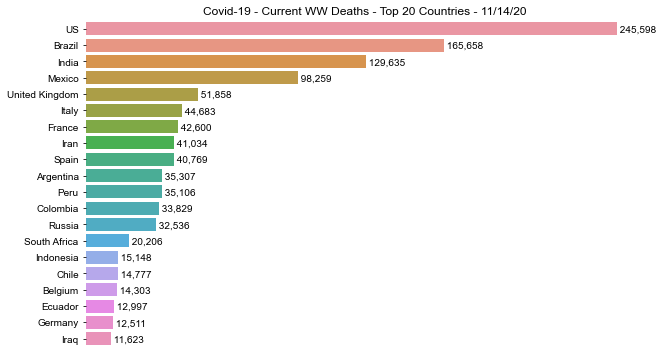

In [8]:
# add value labels on chart
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                # format values on chart
                ax.text(_x, _y, f"{value:,.0f}", ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - float(space/2)
                value = int(p.get_width())
                # format values on chart
                ax.text(_x, _y, f" {value:,.0f}", ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# select subplot SIZE
fig, ax = plt.subplots(figsize=(10, 6))  

# REPLACE data
data = country_totals.sort_values(by='deaths', ascending=False).head(20)
g = sns.barplot(ax=ax, x='deaths', y='country', data=data)

# set DATE
current_date = str(date)

# put VALUES on selected data
show_values_on_bars(g, "h")  

# remove SPINES
sns.despine(left=True, bottom=True)
sns.set_style('white')

# remove LABELS.
g.set_ylabel('')    
g.set_xlabel('')

# remove bottom TICKS
g.set(xticks=[])

# set TITLE
g.set_title("Covid-19 - Current WW Deaths - Top 20 Countries - {}".format(current_date))

# SAVE graph to a file
g.figure.savefig("top20_countries.png")

## Investigate ICU Dataset

In [9]:
icu = pd.read_excel('../data/Other/ICU/KHN_ICU_bed_county_analysis_2.xlsx')
icu.head()

,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct,60plus_per_each_icu_bed
0,1001,Autauga,AL,Alabama,1,1,6,55036,10523,0.191,1754.0
1,1003,Baldwin,AL,Alabama,3,3,51,203360,53519,0.263,1049.0
2,1005,Barbour,AL,Alabama,1,1,5,26201,6150,0.235,1230.0
3,1007,Bibb,AL,Alabama,1,1,0,22580,4773,0.211,NaN
4,1009,Blount,AL,Alabama,1,1,6,57667,13600,0.236,2267.0


In [10]:
# check data
icu.isna().sum()

cnty_fips                       0
cnty_name                       0
st                              0
state                           0
hospitals_in_cost_reports       0
Hospitals_in_HC                 0
all_icu                         0
Total_pop                       0
60plus                          0
60plus_pct                      0
60plus_per_each_icu_bed      1665
dtype: int64

In [11]:
# remove column
icu.drop(['60plus_per_each_icu_bed'], axis=1, inplace=True)

In [12]:
# AZ ICU beds by Population
AZ_icu = icu[icu['st'] == 'AZ'].sort_values(by="Total_pop", ascending=False).head(15)
AZ_icu

,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
103,4013,Maricopa,AZ,Arizona,31,34,1004,4155501,808534,0.195
106,4019,Pima,AZ,Arizona,9,9,296,1007257,245814,0.244
107,4021,Pinal,AZ,Arizona,4,4,22,405537,100086,0.247
109,4025,Yavapai,AZ,Arizona,2,2,39,220972,85127,0.385
104,4015,Mohave,AZ,Arizona,4,4,80,204691,73559,0.359
110,4027,Yuma,AZ,Arizona,1,1,42,204281,45739,0.224
98,4005,Coconino,AZ,Arizona,3,3,41,138639,23195,0.167
97,4003,Cochise,AZ,Arizona,4,4,12,126516,35231,0.278
105,4017,Navajo,AZ,Arizona,4,4,12,107902,24267,0.225
96,4001,Apache,AZ,Arizona,4,4,0,71602,14107,0.197


# US by State covid data - merged with ICU data

In [13]:
# direct link to John Hopkins US timeset data 
data2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

covid_US = pd.read_csv(data2, sep=",")

# preview our data
covid_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,31,30,30,30,30,30,32,32,36,36
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,77,83,83,83,83,84,84,84,84,84
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,9,9,9,9,9,9,9,9,9,9
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,15,15,16,16,16,17,17,17,17,17
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,25,26,26,26,26,26,34,34,34,34


In [14]:
covid_US.shape

(3340, 310)

In [15]:
# check US death counts
covid_US[date].sum()

245598

Missing a data point with the global data - because of changing data, I'm not going to worry about this now.

In [16]:
# merge icu with Covid_US deaths - outer join to collect all deaths (some deaths may not be isolated to county level)
left = covid_US
right = icu
county_deaths = pd.merge(left, right, 
              how='outer', on=None, 
              left_on="FIPS", right_on="cnty_fips")
county_deaths

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1001.0,Autauga,AL,Alabama,1.0,1.0,6.0,55036.0,10523.0,0.191
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,1003.0,Baldwin,AL,Alabama,3.0,3.0,51.0,203360.0,53519.0,0.263
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1005.0,Barbour,AL,Alabama,1.0,1.0,5.0,26201.0,6150.0,0.235
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,1007.0,Bibb,AL,Alabama,1.0,1.0,0.0,22580.0,4773.0,0.211
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,1009.0,Blount,AL,Alabama,1.0,1.0,6.0,57667.0,13600.0,0.236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,56039.0,Teton,WY,Wyoming,1.0,1.0,6.0,22923.0,4298.0,0.187
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,56041.0,Uinta,WY,Wyoming,1.0,1.0,6.0,20758.0,3554.0,0.171
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,56043.0,Washakie,WY,Wyoming,1.0,1.0,0.0,8253.0,2206.0,0.267


In [17]:
# remove columns that are doubled by merge
county_deaths.drop(columns=['cnty_fips','cnty_name','state'])

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/12/20,11/13/20,11/14/20,st,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,32,36,36,AL,1.0,1.0,6.0,55036.0,10523.0,0.191
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,84,84,84,AL,3.0,3.0,51.0,203360.0,53519.0,0.263
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,9,9,9,AL,1.0,1.0,5.0,26201.0,6150.0,0.235
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,17,17,17,AL,1.0,1.0,0.0,22580.0,4773.0,0.211
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,34,34,34,AL,1.0,1.0,6.0,57667.0,13600.0,0.236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,2,2,2,WY,1.0,1.0,6.0,22923.0,4298.0,0.187
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,4,4,4,WY,1.0,1.0,6.0,20758.0,3554.0,0.171
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,7,7,7,WY,1.0,1.0,0.0,8253.0,2206.0,0.267


# Visualize - US State Data

In [18]:
# group the state deaths
states = county_deaths[['Province_State', date]].copy()
states = states.groupby(['Province_State'], sort=False).sum().reset_index()

# show descending
states = states.sort_values(by=date, ascending=False)
states.head(10)

,Province_State,11/14/20
37,New York,34010
50,Texas,19918
5,California,18253
11,Florida,17489
35,New Jersey,16548
17,Illinois,11088
25,Massachusetts,10293
44,Pennsylvania,9252
12,Georgia,8956
26,Michigan,8376


In [19]:
# check total deaths
states[date].sum()

245598

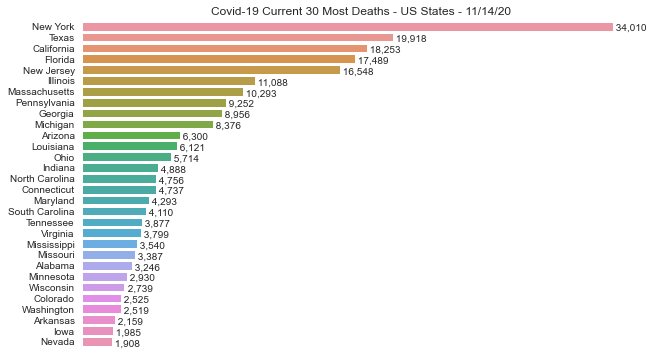

In [20]:
# function for setting horizontal labels
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                # format values on chart
                ax.text(_x, _y, f"{value:,.0f}", ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                # format values on chart
                ax.text(_x, _y, f" {value:,.0f}", ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# SET subplot size
fig, ax = plt.subplots(figsize=(10, 6))  

# REPLACE dataset
data = states.head(30)
current_date = str(date)

# plot VALUES on selected data
g = sns.barplot(ax=ax, x=date, y='Province_State', data=data)
show_values_on_bars(g, "h")  

# remove spines
sns.despine(left=True, bottom=True)
sns.set_style('white')

# remove labels.
g.set_ylabel('')    
g.set_xlabel('')

# remove bottom values
g.set(xticks=[])

# set TITLE
g.set_title("Covid-19 Current 30 Most Deaths - US States - {}".format(current_date))

# save graph to a FILENAME
g.figure.savefig("US_states30.png")

## Visualize - AZ County Deaths

In [21]:
# tally of county deaths
co = county_deaths[['Admin2', 'Province_State', date]].copy()
co.rename(columns = {'Admin2':'county','Province_State':'state',date:'total_deaths'}, inplace = True)
co = co.sort_values(by='total_deaths', ascending=False)
co.head(10)

,county,state,total_deaths
1929,Kings,New York,7450
1947,Queens,New York,7321
213,Los Angeles,California,7266
640,Cook,Illinois,5976
1908,Bronx,New York,5019
108,Maricopa,Arizona,3797
382,Miami-Dade,Florida,3707
1936,New York,New York,3204
1372,Wayne,Michigan,3119
2804,Harris,Texas,2908


In [22]:
# check total deaths
co["total_deaths"].sum()

245598

In [23]:
# check AZ totals by county
AZ_county = co[co['state']=='Arizona']
AZ_county

,county,state,total_deaths
108,Maricopa,Arizona,3797
112,Pima,Arizona,670
117,Yuma,Arizona,365
110,Navajo,Arizona,261
109,Mohave,Arizona,244
113,Pinal,Arizona,239
101,Apache,Arizona,189
103,Coconino,Arizona,159
116,Yavapai,Arizona,103
104,Gila,Arizona,78


Hmmm...Unassigned and Out of AZ need to reassigned ... eventually...for now I'll keep them in the totals

In [24]:
# deaths in AZ - check with chart of states
AZ_county['total_deaths'].sum()

6300

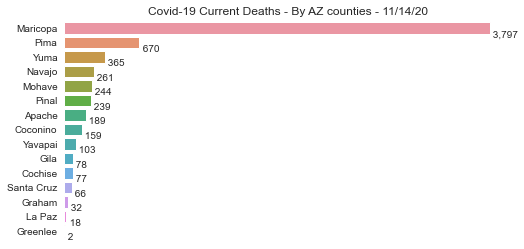

In [25]:
# add values on chart
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                # format values on chart
                ax.text(_x, _y, f"{value:,.0f}", ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()+ float(space/2)
                value = int(p.get_width())
                # format values on chart
                ax.text(_x, _y, f" {value:,.0f}", ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# select subplot size
fig, ax = plt.subplots(figsize=(8, 4))  

# put values on selected data
data = AZ_county[AZ_county['total_deaths'] >= 1]
g = sns.barplot(ax=ax, x='total_deaths', y='county', data=data)
show_values_on_bars(g, "h")  

# remove spines
sns.despine(left=True, bottom=True)
sns.set_style('white')

# remove labels.
g.set_ylabel('')    
g.set_xlabel('')

# remove bottom values
g.set(xticks=[])

# set title
g.set_title("Covid-19 Current Deaths - By AZ counties - {}".format(str(date)))

# save graph to a file
g.figure.savefig("AZ_counties_list.png")

# Timeseries - Worldwide

In [26]:
# look at past month worldwide
covid_ww = covid.iloc[:, 4:].sum(axis=0)
df = covid_ww.tail(30)
df.tail()

11/10/20    1273012
11/11/20    1284636
11/12/20    1293954
11/13/20    1302556
11/14/20    1311192
dtype: int64

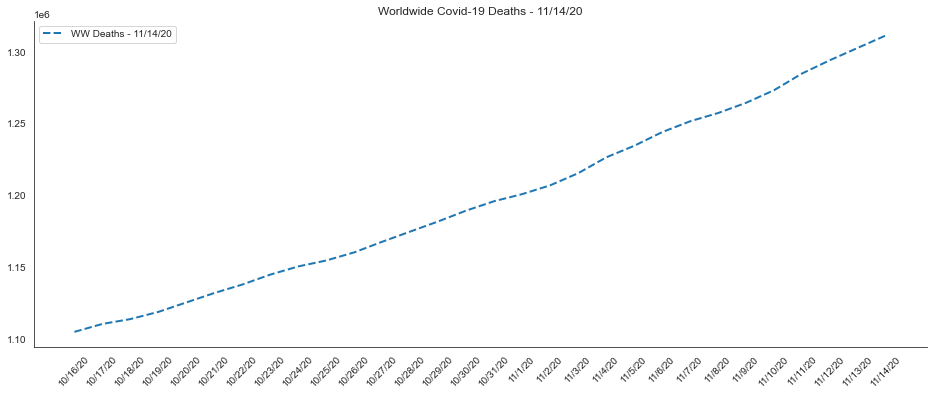

In [27]:
# simple graph
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x=df.index, y=df, sort=False, linewidth=2)
sns.despine(right=True, top=True)
ax.lines[0].set_linestyle("--")
plt.xticks(rotation=45)
ax.legend(['WW Deaths - {}'.format(str(date))]) 
plt.title("Worldwide Covid-19 Deaths - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("WW_deaths.png")

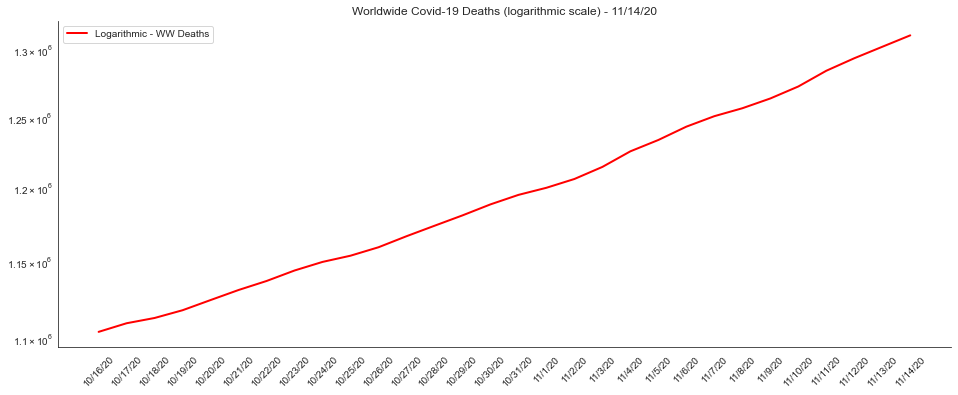

In [28]:
# look at logarithmic growth
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)) )
sns.lineplot(x=df.index, y=df, sort=False, linewidth=2, color='red')
sns.despine(right=True, top=True)
ax.lines[0].set_linestyle("-")
plt.xticks(rotation=45)
ax.legend(['Logarithmic - WW Deaths']) 
plt.title("Worldwide Covid-19 Deaths (logarithmic scale) - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("WW_deaths_log.png")

## WW - > Multiple Country Timeseries

In [29]:
# melt dataset - Keep certain columns and change others to vertical axis(?)
covid_ww_long = pd.melt(covid, id_vars=covid.iloc[:, :4],
var_name='Date', value_name='Deaths')
covid_ww_long

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
80157,NaN,West Bank and Gaza,31.952200,35.233200,11/14/20,558
80158,NaN,Western Sahara,24.215500,-12.885800,11/14/20,1
80159,NaN,Yemen,15.552727,48.516388,11/14/20,605
80160,NaN,Zambia,-13.133897,27.849332,11/14/20,350


In [30]:
# group countries by date - sort is False here because the date is not the sort
countries = covid_ww_long.groupby(['Date', 'Country/Region'], sort=False).sum().reset_index()

# drop columns that don't make sense
countries.drop(['Lat','Long'], axis=1, inplace=True)

# look at timeseries 
countries

,Date,Country/Region,Deaths
0,1/22/20,Afghanistan,0
1,1/22/20,Albania,0
2,1/22/20,Algeria,0
3,1/22/20,Andorra,0
4,1/22/20,Angola,0
...,...,...,...
56913,11/14/20,West Bank and Gaza,558
56914,11/14/20,Western Sahara,1
56915,11/14/20,Yemen,605
56916,11/14/20,Zambia,350


In [31]:
# check that it matches above summary
top = countries[countries['Date']==date].sort_values(by='Deaths', ascending = False).head(10)
top

,Date,Country/Region,Deaths
56903,11/14/20,US,245598
56750,11/14/20,Brazil,165658
56806,11/14/20,India,129635
56841,11/14/20,Mexico,98259
56907,11/14/20,United Kingdom,51858
56812,11/14/20,Italy,44683
56789,11/14/20,France,42600
56808,11/14/20,Iran,41034
56887,11/14/20,Spain,40769
56733,11/14/20,Argentina,35307


In [32]:
# total deaths in top
top['Deaths'].sum()

895401

### Worldwide Timeseries - Graphs

In [33]:
# add a column for LEGEND to top
top['legend']= top['Country/Region'] + ' - ' + top['Deaths'].astype(str)

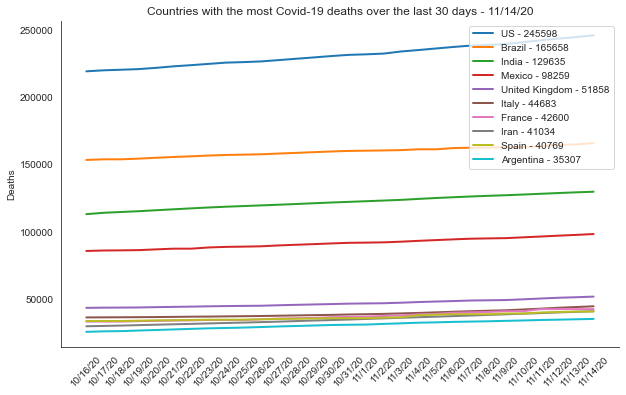

In [34]:
# SET subplot size
fig, ax = plt.subplots(figsize=(10, 6))  

# set ATTRIBUTEs for each dataset
for i in top['Country/Region']:
    # set data to last 30 days
    df = countries[countries['Country/Region' ] == i].tail(30)
    # set graph
    g = sns.lineplot(ax=ax, x='Date', y='Deaths', data=df, sort=False, linewidth=2)  

# set date 
current_date = str(date) 

# remove spines
sns.despine(right=True, top=True)
sns.set_style('white')

# set TITLE
g.set_title("Countries with the most Covid-19 deaths over the last 30 days - {}".format(current_date))

# set extras
g.set_xlabel("")
plt.legend(top['legend'])
plt.xticks(rotation=45)
plt.show()

# save graph to a FILENAME
fig.savefig("Top10_countries.png")

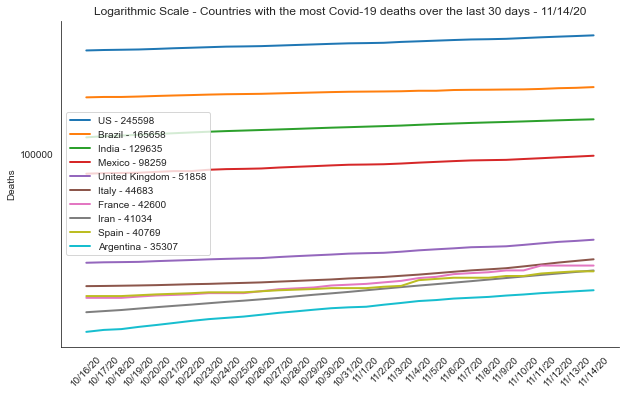

In [35]:
# SET subplot size
fig, ax = plt.subplots(figsize=(10, 6))  

# set log scale
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)) )

# set ATTRIBUTEs for each dataset
for i in top['Country/Region']:
    # set data to last 30 days
    df = countries[countries['Country/Region' ] == i].tail(30)
    # set graph
    g = sns.lineplot(ax=ax, x='Date', y='Deaths', data=df, sort=False, linewidth=2)  

# set line style
ax.lines[0].set_linestyle("-")

# set date 
current_date = str(date) 

# remove spines
sns.despine(right=True, top=True)
sns.set_style('white')

# set TITLE
g.set_title("Logarithmic Scale - Countries with the most Covid-19 deaths over the last 30 days - {}".format(current_date))

# set extras
g.set_xlabel("")
plt.legend(top['legend'])
plt.xticks(rotation=45)
plt.show()

# save graph to a FILENAME
fig.savefig("Top10_countries_log.png")

## Arizona timeseries

In [36]:
# AZ Deaths by Date, ICU and Population 
AZ = county_deaths[county_deaths['Province_State']=='Arizona']

In [37]:
# investigate AZ dataset
AZ.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
101,84004001,US,USA,840,4001.0,Apache,Arizona,US,35.394650,-109.489238,...,4001.0,Apache,AZ,Arizona,4.0,4.0,0.0,71602.0,14107.0,0.197
102,84004003,US,USA,840,4003.0,Cochise,Arizona,US,31.879347,-109.751609,...,4003.0,Cochise,AZ,Arizona,4.0,4.0,12.0,126516.0,35231.0,0.278
103,84004005,US,USA,840,4005.0,Coconino,Arizona,US,35.838834,-111.770718,...,4005.0,Coconino,AZ,Arizona,3.0,3.0,41.0,138639.0,23195.0,0.167
104,84004007,US,USA,840,4007.0,Gila,Arizona,US,33.801901,-110.813278,...,4007.0,Gila,AZ,Arizona,3.0,3.0,8.0,53145.0,18752.0,0.353
105,84004009,US,USA,840,4009.0,Graham,Arizona,US,32.931669,-109.888218,...,4009.0,Graham,AZ,Arizona,1.0,1.0,0.0,37700.0,6933.0,0.184


In [38]:
# drop extra columns (not dates)
drops = ['UID','iso2','iso3','code3','Province_State','Country_Region','cnty_fips','cnty_name','st','state','hospitals_in_cost_reports','Hospitals_in_HC','all_icu','Total_pop','60plus','60plus_pct']
AZ_dates = AZ.drop(drops, axis=1,inplace=False)
AZ_dates.tail()

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20
113,4021.0,Pinal,32.905256,-111.344948,"Pinal, Arizona, US",462789,0,0,0,0,...,230,230,231,231,231,232,234,234,236,239
114,4023.0,Santa Cruz,31.525090,-110.847909,"Santa Cruz, Arizona, US",46498,0,0,0,0,...,65,66,66,66,66,66,66,66,66,66
115,90004.0,Unassigned,0.000000,0.000000,"Unassigned, Arizona, US",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116,4025.0,Yavapai,34.599339,-112.553859,"Yavapai, Arizona, US",235099,0,0,0,0,...,92,92,99,101,101,101,101,101,102,103
117,4027.0,Yuma,32.768957,-113.906667,"Yuma, Arizona, US",213787,0,0,0,0,...,361,361,363,363,363,363,365,365,365,365


## Calculating METRICS

In [39]:
# Yesterday's date

# Today's date
today = datetime.now()

# if time is after 5pm (Tucson time), then use today's date 
today5pm = today.replace(hour=17, minute=1, second=0, microsecond=0)
if today > today5pm:
    date_ext = today  

# otherwise use yesterday's date for data
else:
    date_ext = today - timedelta(1)
    
# define yesterday (external) is in datetime format
yesterday_ext = date_ext - timedelta(1)

# yesterday in string format
yesterday = yesterday_ext.strftime('%D').lstrip("0").replace(" 0", " ")
yesterday = yesterday.replace("/0", "/")
yesterday

'11/13/20'

In [40]:
# Add Changes , Pct_change, and Pct_pop columns
AZ_dates['Change'] = AZ_dates[date] - AZ_dates[yesterday]
AZ_dates['Pct_change'] = AZ_dates['Change']/AZ_dates[yesterday]*100
AZ_dates['Deaths_per_mil']= AZ_dates[date]/AZ_dates['Population']*1000000

### Metrics for Total AZ Deaths by County

In [41]:
# Show list of counties and current deaths by Population size
AZ_dates = AZ_dates.sort_values(by='Population', ascending=False)

# Add all metrics - rounded
AZ_dates[['Combined_Key', 'Population', date,'Change', 'Pct_change','Deaths_per_mil']].round()

,Combined_Key,Population,11/14/20,Change,Pct_change,Deaths_per_mil
108,"Maricopa, Arizona, US",4485414,3797,23,1.0,847.0
112,"Pima, Arizona, US",1047279,670,1,0.0,640.0
113,"Pinal, Arizona, US",462789,239,3,1.0,516.0
116,"Yavapai, Arizona, US",235099,103,1,1.0,438.0
117,"Yuma, Arizona, US",213787,365,0,0.0,1707.0
109,"Mohave, Arizona, US",212181,244,2,1.0,1150.0
103,"Coconino, Arizona, US",143476,159,6,4.0,1108.0
102,"Cochise, Arizona, US",125922,77,1,1.0,611.0
110,"Navajo, Arizona, US",110924,261,2,1.0,2353.0
101,"Apache, Arizona, US",71887,189,2,1.0,2629.0


### AZ timeseries by county

In [42]:
# drop extra columns
AZ_dates.drop(['Change', 'Pct_change','Deaths_per_mil'], axis=1, inplace=True)
AZ_dates.tail()

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20
105,4009.0,Graham,32.931669,-109.888218,"Graham, Arizona, US",38837,0,0,0,0,...,31,31,31,31,31,31,31,31,31,32
107,4012.0,La Paz,33.728542,-113.981003,"La Paz, Arizona, US",21108,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18
106,4011.0,Greenlee,33.214988,-109.240528,"Greenlee, Arizona, US",9498,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
111,80004.0,Out of AZ,0.000000,0.000000,"Out of AZ, Arizona, US",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115,90004.0,Unassigned,0.000000,0.000000,"Unassigned, Arizona, US",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# melt dataset - Keep certain columns and change others to vertical axis(?)
AZ_counties = pd.melt(AZ_dates, id_vars=AZ_dates.iloc[:, :6],
var_name='Date', value_name='Deaths')
AZ_counties

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,Date,Deaths
0,4013.0,Maricopa,33.348359,-112.491815,"Maricopa, Arizona, US",4485414,1/22/20,0
1,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,1/22/20,0
2,4021.0,Pinal,32.905256,-111.344948,"Pinal, Arizona, US",462789,1/22/20,0
3,4025.0,Yavapai,34.599339,-112.553859,"Yavapai, Arizona, US",235099,1/22/20,0
4,4027.0,Yuma,32.768957,-113.906667,"Yuma, Arizona, US",213787,1/22/20,0
...,...,...,...,...,...,...,...,...
5061,4009.0,Graham,32.931669,-109.888218,"Graham, Arizona, US",38837,11/14/20,32
5062,4012.0,La Paz,33.728542,-113.981003,"La Paz, Arizona, US",21108,11/14/20,18
5063,4011.0,Greenlee,33.214988,-109.240528,"Greenlee, Arizona, US",9498,11/14/20,2
5064,80004.0,Out of AZ,0.000000,0.000000,"Out of AZ, Arizona, US",0,11/14/20,0


In [44]:
# add a column for LEGEND to top
AZ_counties['legend']= AZ_counties['Admin2'] + ' - ' + AZ_counties['Deaths'].astype(str)
AZ_counties

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,Date,Deaths,legend
0,4013.0,Maricopa,33.348359,-112.491815,"Maricopa, Arizona, US",4485414,1/22/20,0,Maricopa - 0
1,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,1/22/20,0,Pima - 0
2,4021.0,Pinal,32.905256,-111.344948,"Pinal, Arizona, US",462789,1/22/20,0,Pinal - 0
3,4025.0,Yavapai,34.599339,-112.553859,"Yavapai, Arizona, US",235099,1/22/20,0,Yavapai - 0
4,4027.0,Yuma,32.768957,-113.906667,"Yuma, Arizona, US",213787,1/22/20,0,Yuma - 0
...,...,...,...,...,...,...,...,...,...
5061,4009.0,Graham,32.931669,-109.888218,"Graham, Arizona, US",38837,11/14/20,32,Graham - 32
5062,4012.0,La Paz,33.728542,-113.981003,"La Paz, Arizona, US",21108,11/14/20,18,La Paz - 18
5063,4011.0,Greenlee,33.214988,-109.240528,"Greenlee, Arizona, US",9498,11/14/20,2,Greenlee - 2
5064,80004.0,Out of AZ,0.000000,0.000000,"Out of AZ, Arizona, US",0,11/14/20,0,Out of AZ - 0


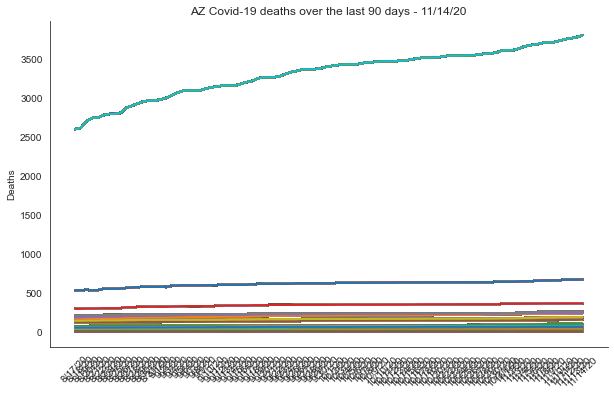

In [54]:
# SET subplot size
fig, ax = plt.subplots(figsize=(10, 6))  

# # set log scale
# ax.set(yscale="log")
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)) )

# set ATTRIBUTEs for each dataset
for i in AZ_counties['Admin2']:
    # set data to last 30 days
    df = AZ_counties[AZ_counties['Admin2'] == i].tail(90)
    # set graph
    g = sns.lineplot(ax=ax, x='Date', y='Deaths', data=df, sort=False, linewidth=2)  

# set line style
ax.lines[0].set_linestyle("-")

# set date 
current_date = str(date) 

# remove spines
sns.despine(right=True, top=True)
sns.set_style('white')

# set TITLE
g.set_title("AZ Covid-19 deaths over the last 90 days - {}".format(current_date))

# set extras
g.set_xlabel("")
plt.xticks(rotation=45)
plt.show()

# save graph to a FILENAME
fig.savefig("AZ_counties.png")

### STUCK ON GETTING THE LEGEND RIGHT!
#### They relabeled some entries  on 4/18/20. Pima has just started reporting more regularly than once or twice a week!

## Calculating Pima PCT_CHANGE

In [46]:
Pima_dates=AZ_dates[AZ_dates['Admin2']=='Pima'].copy()
Pima_dates

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20
112,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,0,0,0,0,...,650,653,658,659,659,661,669,669,669,670


In [47]:
# unpivot DataFrame from wide to long format, optionally leaving identifiers set.
Pima_long = pd.melt(Pima_dates, id_vars=Pima_dates.iloc[:,:6],
var_name='Date', value_name='Deaths')
Pima_long.tail()


,FIPS,Admin2,Lat,Long_,Combined_Key,Population,Date,Deaths
293,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/10/20,661
294,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/11/20,669
295,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/12/20,669
296,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/13/20,669
297,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/14/20,670


In [48]:
Pima30 = Pima_long.copy().tail(30)
Pima30[['PC']]=Pima30[['Deaths']].pct_change()
Pima30.tail()

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,Date,Deaths,PC
293,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/10/20,661,0.003035
294,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/11/20,669,0.012103
295,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/12/20,669,0.000000
296,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/13/20,669,0.000000
297,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/14/20,670,0.001495


In [49]:
# set dataset for graphs
df = Pima30
df=df[df['Deaths']>0]
df.tail(10)

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,Date,Deaths,PC
288,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/5/20,650,0.004637
289,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/6/20,653,0.004615
290,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/7/20,658,0.007657
291,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/8/20,659,0.001520
292,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/9/20,659,0.000000
293,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/10/20,661,0.003035
294,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/11/20,669,0.012103
295,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/12/20,669,0.000000
296,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/13/20,669,0.000000
297,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/14/20,670,0.001495


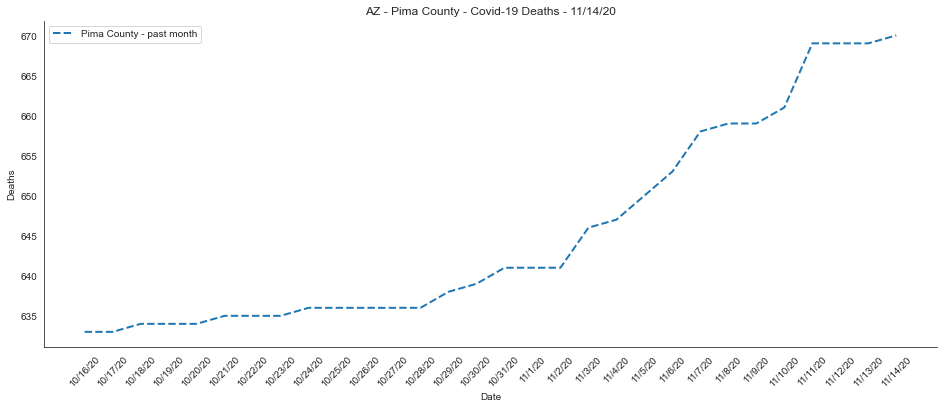

In [50]:
# simple timeseries graph
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x='Date', y='Deaths', data=df, sort=False, linewidth=2)
sns.despine(right=True, top=True)
ax.lines[0].set_linestyle("--")
plt.xticks(rotation=45)
ax.legend(['Pima County - past month']) 
plt.title("AZ - Pima County - Covid-19 Deaths - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("Pima_deaths.png")

###### What do I do when reporting is like this? Does ML take this into account? 

Should I redo the dataset to weekly? Trailing 7 day? Trailing 3 day?

## TO DO:
1. Change data to look at increment per day per country - KEY!!!!!!!!!
2. Look at rate of increase
3. Look at time-series - # of days vs # of deaths, # of days vs. # of cases
4. Separate out test cases vs training case
    - US separately is the Test case
    - outlier - South Korea, Singapore, China
    - ROW is the training case
5. Look at 2 plots
    - in deaths 
    - in deaths as a % of pop
    

In [51]:
Pima90 = Pima_long.copy().tail(90)
Pima90[['PC']]=Pima90[['Deaths']].pct_change()
Pima90.tail()

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,Date,Deaths,PC
293,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/10/20,661,0.003035
294,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/11/20,669,0.012103
295,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/12/20,669,0.000000
296,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/13/20,669,0.000000
297,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/14/20,670,0.001495


In [52]:
# set dataset for graphs
df = Pima90
df=df[df['Deaths']>0]
df.tail(10)

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,Date,Deaths,PC
288,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/5/20,650,0.004637
289,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/6/20,653,0.004615
290,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/7/20,658,0.007657
291,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/8/20,659,0.001520
292,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/9/20,659,0.000000
293,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/10/20,661,0.003035
294,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/11/20,669,0.012103
295,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/12/20,669,0.000000
296,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/13/20,669,0.000000
297,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,11/14/20,670,0.001495


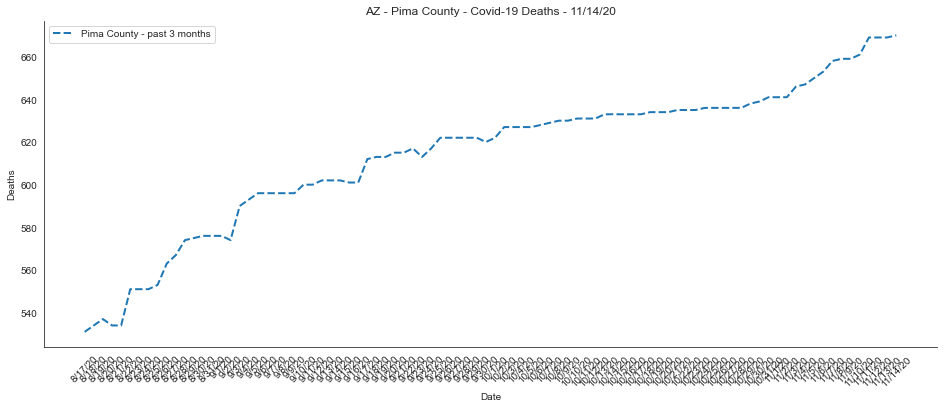

In [53]:
# simple timeseries graph
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x='Date', y='Deaths', data=df, sort=False, linewidth=2)
sns.despine(right=True, top=True)
ax.lines[0].set_linestyle("--")
plt.xticks(rotation=45)
ax.legend(['Pima County - past 3 months']) 
plt.title("AZ - Pima County - Covid-19 Deaths - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("Pima_deaths90.png")